<a href="https://colab.research.google.com/github/Ranjitha23ds/Biz_Card/blob/main/Bizcard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git config --global user.email "ranjithaccs.r@gmail.com"
!git config --global user.name "Ranjitha23ds"


In [ ]:
!git clone https://github.com/Ranjitha23ds/Biz_Card.git


Cloning into 'Biz_Card'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), done.


In [ ]:
!cp project.ipynb /content/Biz_Card/


cp: cannot stat 'project.ipynb': No such file or directory


In [ ]:
%pip install easyocr opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

In [ ]:
# creating a db in google drive
import os
import os

# List everything in "MyDrive"
from google.colab import drive
drive.mount('/content/drive')
# List everything in "MyDrive"
mydrive_path = '/content/drive/MyDrive'
print(os.listdir(mydrive_path))


Mounted at /content/drive
['foss', 'RANJITHA', 'ppt.pptx', 'ppt.pptx.gslides', 'Ootha- Minsara Kanna-Hariharan[48]--Raag.Me--.mp3', 'conference.docx', 'Colab Notebooks', 'Ranjitha - CV.pdf', 'Ranjitha - DS(CV).pdf', 'IMG_20220711_192826.jpg', 'Untitled design.png', 'Untitled design (1).png', 'Voice 001.m4a', 'img20240306_11050174.pdf', 'Screenshot (36).png', 'BizcardDB']


In [ ]:
import sqlite3
conn=sqlite3.connect("biz_cards.db")
cursor=conn.cursor()

In [ ]:
import shutil

source_path = '/content/Bizcard.db'
destination_path = '/content/drive/MyDrive/BizcardDB/Bizcard.db'

shutil.move(source_path, destination_path)

print("Database moved to:", destination_path)


Database moved to: /content/drive/MyDrive/BizcardDB/Bizcard.db


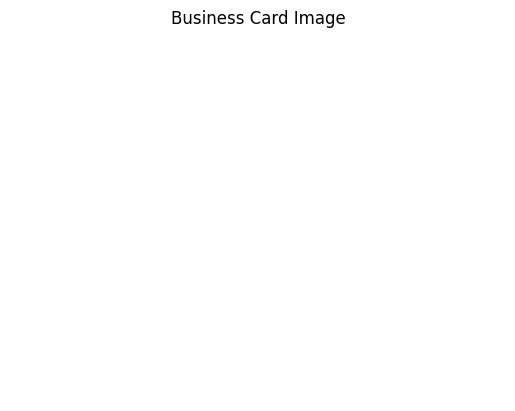

['Selva', 'DATA MANAGER', '+123-456-7890', '+123-456-7891', 'WWW XYZI.com', 'hello@XYZ1.com', '123 ABC St , Chennai;', 'selva', 'TamilNadu 600113', 'digitals']


In [5]:
import easyocr
import cv2
import matplotlib.pyplot as plt
import warnings
import re
warnings.filterwarnings("ignore", category=UserWarning, module='easyocr')

# Path to your image
image_path = r"/content/1.png"

# Step 1: Load the image
image = cv2.imread(image_path)
with open(image_path,'rb')as file:
  #image=file.read()
# Optional: Display the image
#plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title("Business Card Image")
  plt.axis("off")
  plt.show()

# Step 2: Create EasyOCR reader
reader = easyocr.Reader(['en'])  # You can add more languages if needed

# Step 3: Perform OCR
results = reader.readtext(image,detail=0)
print(results)
#texts = [text for _, text, _ in results]

#print(texts)


In [ ]:
def extract_data(image_path):
  image = cv2.imread(image_path)
# Optional: Display the image
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title("Business Card Image")
  plt.axis("off")
  plt.show()

  # Step 2: Create EasyOCR reader
  reader = easyocr.Reader(['en'])  # You can add more languages if needed

  # Step 3: Perform OCR
  results = reader.readtext(image,detail=0)
  return results

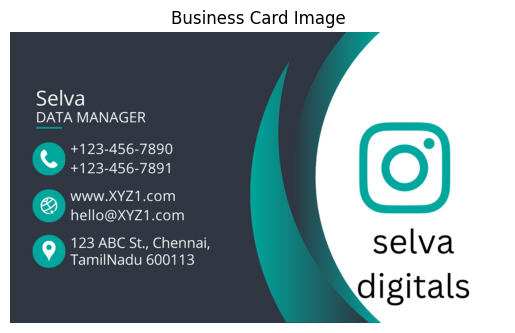

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete['Selva', 'DATA MANAGER', '+123-456-7890', '+123-456-7891', 'WWW XYZI.com', 'hello@XYZ1.com', '123 ABC St , Chennai;', 'selva', 'TamilNadu 600113', 'digitals']


In [ ]:
import easyocr
import matplotlib.pyplot as plt
import cv2
import warnings

# Suppress EasyOCR warnings
warnings.filterwarnings("ignore", category=UserWarning, module='easyocr')

def extract_data(image_path):
    # Step 1: Read the image using OpenCV
    image = cv2.imread(image_path)

    # Optional: Display the image (you can comment this out if you don't need it)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Business Card Image")
    plt.axis("off")
    plt.show()

    # Step 2: Initialize EasyOCR reader
    reader = easyocr.Reader(['en'])  # English language
    # Step 3: Perform OCR and get the results as a list of detected text
    results = reader.readtext(image, detail=0)  # detail=0 returns only the text

    # Step 4: Return both the image and the results
    return image, results

def process_data(image, extracted_text):
    #print("Extracted Text:")
    l=[]
    for idx, line in enumerate(extracted_text, start=1):
      l.append(line)
    return(l)


    # Optionally, save the image or use it later
    # cv2.imwrite('output_image.jpg', image)  # You can save the image if needed

# Main program
image_path = '/content/1.png'

# Extract both the image and the text
image, results = extract_data(image_path)

# Process the results (you can add additional processing here)
image_1=process_data(image,results)
print(image_1)


In [ ]:
import cv2
def dic_formate(results):
    data={"company_name":[],
      "Name":[],
      "designation":[],
      "phone_num":[],
      "email":[],
      "website":[],
      "Area":[],
      "city":[],
      "pincode":[],
      "state":[],
      "Image":[]}
    #if image is not None:
       # _, img_encoded = cv2.imencode('.jpg', image)
        #data["Image"] = img_encoded.tobytes()


    # Store image bytes
    #data["Image"].append(img_bytes)

    #data["Image"].append(image)
    data["Name"].append(results[0])
    data["designation"].append(results[1])
    phone_pattern=re.compile(r"\+?\(?\d{1,3}\)?[-\s]?\d{3}[-\s]?\d{4}")
    #domain_pattern=re.compile(r"(?:www\.?|WWW\.?|wWW\.?|Www\.?)?\s*([\w.-]+\.\w{2,})", re.IGNORECASE)

    email_pattern=re.compile(r"^[A-Za-z0-9._+%-]+@[A-Za-z0-9-.]+\.[A-Za-z]{2,}$")

    for ind, i in enumerate(results):
        if phone_pattern.match(i):
            data["phone_num"].append(i)
        if email_pattern.match(i):


            data["email"].append(i)

        if re.findall("^[0-9].+, [a-zA-Z]+", i):
            data["Area"].append(i.split(",")[0])
        elif re.findall("[0-9] [a-zA-Z]+", i):
            data["Area"].append(i)
        if "www " in i.lower() or "www." in i.lower():
            data["website"].append(i)
        elif "WWW" in i:

            res=results[ind]+'.'+results[ind+1]
            data["website"].append(res)
        c_match=re.fullmatch(r"^St ,$",i)
        if c_match:
          if ind==len(results)-1 and len(results)>2:
              data["company_name"].append(results[-2])

        elif ind==len(results)-1:
            data["company_name"].append(i)
        match1 = re.findall(r".+St,,\s*([a-zA-Z]+).+", i)
        match2=re.findall(r".+St ,\s([a-zA-Z]+)", i)
        match3=re.findall(r"^[E].+",i)
        if match1:
            data["city"].append(match1[0])
        elif match2:
            data["city"].append(match2[0])
        elif match3:
            data["city"].append(match3[0])
        pin_1=re.findall(r"\d{6}",i)
        pin_2=re.findall(r"[a-zA-z]+\s([\d{6}])",i)
        if pin_1:
            data["pincode"].append(i)
        elif pin_2:
            data["pincode"].append(pin_2[1])
        state1=re.findall(r"([a-zA-z]+)\s[\d{6}]",i)
        #state2=re.findall(r"\s*([A-Za-z]+)[,]",i)
        state2=re.findall(r"\s([A-Za-z]+Nadu)",i)
        #print(f"state1: {state1}, state2: {state2}")
        if state1:
            data["state"].append(state1[0])
        elif state2:
            if len(state2) > 0:
                data["state"].append(state2[0])
        #elif state3:
        # data["state"].append(state3[1])
    return(data)


In [ ]:
res=dic_formate(results,image)
print(res)

{'company_name': ['digitals'], 'Name': ['Selva'], 'designation': ['DATA MANAGER'], 'phone_num': ['+123-456-7890', '+123-456-7891'], 'email': ['hello@XYZ1.com'], 'website': ['WWW XYZI.com'], 'Area': ['123 ABC St '], 'city': ['Chennai'], 'pincode': ['TamilNadu 600113'], 'state': ['TamilNadu'], 'Image': [b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x01\x01\x01\x01\x02\x01\x01\x01\x02\x02\x02\x02\x02\x04\x03\x02\x02\x02\x02\x05\x04\x04\x03\x04\x06\x05\x06\x06\x06\x05\x06\x06\x06\x07\t\x08\x06\x07\t\x07\x06\x06\x08\x0b\x08\t\n\n\n\n\n\x06\x08\x0b\x0c\x0b\n\x0c\t\n\n\n\xff\xdb\x00C\x01\x02\x02\x02\x02\x02\x02\x05\x03\x03\x05\n\x07\x06\x07\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\xff\xc0\x00\x11\x08\x02N\x03\xec\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x0

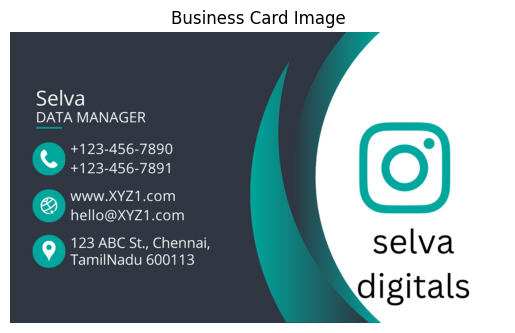

error: OpenCV(4.11.0) :-1: error: (-5:Bad argument) in function 'imencode'
> Overload resolution failed:
>  - img is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'img'


In [ ]:
image_paths = ["/content/1.png", "/content/2.png", "/content/3.png", "/content/4.png", "/content/5.png"]

for path in image_paths:
    image, extracted_text = extract_data(path)
    #process_data(image, extracted_text)
    dic=dic_formate(image, extracted_text)
    print(dic)

    #data = process_and_structure_data(image, extracted_text)  # your processing logic
    #store_in_db(data)


In [ ]:
from PIL import Image
import numpy as np
def extract_data(image_path):
    image = Image.open(image_path)
    image_np = np.array(image)
    plt.imshow(image)
    plt.title("Business Card Image")
    plt.axis("off")
    plt.show()

    reader = easyocr.Reader(['en'])
    results = reader.readtext(image_np, detail=0)
    return results,image

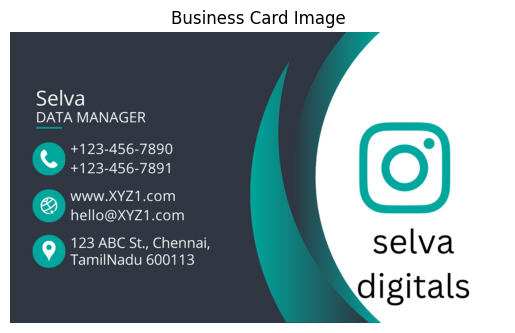

['Selva', 'DATA MANAGER', '+123-456-7890', '+123-456-7891', 'WWW XYZI.com', 'hello@XYZ1.com', '123 ABC St , Chennai;', 'selva', 'TamilNadu 600113', 'digitals'] <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1004x590 at 0x7C33BE2B1750>


In [ ]:
text,image=extract_data("/content/1.png")
print(text,image)


In [ ]:
import easyocr
import cv2
import matplotlib.pyplot as plt
import warnings
import re
def extract_data(image_path):
  image = cv2.imread(image_path)
# Optional: Display the image
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title("Business Card Image")
  plt.axis("off")
  plt.show()

  # Step 2: Create EasyOCR reader
  reader = easyocr.Reader(['en'])  # You can add more languages if needed

  # Step 3: Perform OCR
  results = reader.readtext(image,detail=0)
  return results

In [ ]:
import cv2
def dic_formate(results):
    data={"company_name":[],
      "Name":[],
      "designation":[],
      "phone_num":[],
      "email":[],
      "website":[],
      "Area":[],
      "city":[],
      "pincode":[],
      "state":[]
      }
    #if image is not None:
       # _, img_encoded = cv2.imencode('.jpg', image)
        #data["Image"] = img_encoded.tobytes()
    #if image_path is not None:
     #   data["Image"].append(image_path)

    # Store image bytes
    #data["Image"].append()

    #data["Image"].append(image)
    data["Name"].append(results[0])
    data["designation"].append(results[1])
    phone_pattern=re.compile(r"\+?\(?\d{1,3}\)?[-\s]?\d{3}[-\s]?\d{4}")
    #domain_pattern=re.compile(r"(?:www\.?|WWW\.?|wWW\.?|Www\.?)?\s*([\w.-]+\.\w{2,})", re.IGNORECASE)

    email_pattern=re.compile(r"^[A-Za-z0-9._+%-]+@[A-Za-z0-9-.]+\.[A-Za-z]{2,}$")

    for ind, i in enumerate(results):
        if phone_pattern.match(i):
            data["phone_num"].append(i)
        if email_pattern.match(i):


            data["email"].append(i)

        if re.findall("^[0-9].+, [a-zA-Z]+", i):
            data["Area"].append(i.split(",")[0])
        elif re.findall("[0-9] [a-zA-Z]+", i):
            data["Area"].append(i)
        if "www " in i.lower() or "www." in i.lower():
            data["website"].append(i)
        elif "WWW" in i:

            res=results[ind]+'.'+results[ind+1]
            data["website"].append(res)
        c_match=re.fullmatch(r"^St ,$",i)
        if c_match:
          if ind==len(results)-1 and len(results)>2:
              data["company_name"].append(results[-2])

        elif ind==len(results)-1:
            data["company_name"].append(i)
        match1 = re.findall(r".+St,,\s*([a-zA-Z]+).+", i)
        match2=re.findall(r".+St ,\s([a-zA-Z]+)", i)
        match3=re.findall(r"^[E].+",i)
        if match1:
            data["city"].append(match1[0])
        elif match2:
            data["city"].append(match2[0])
        elif match3:
            data["city"].append(match3[0])
        pin_1=re.search(r"\b[1-9]\d{2}\s?\d{3}\b",i)
        pin_2=re.findall(r"[a-zA-z]+\s(\d{6})",i)
        if pin_1:
            data["pincode"].append(i)
        elif pin_2:
            data["pincode"].append(pin_2[0])
        state1=re.findall(r"([a-zA-z]+)\s[\d{6}]",i)
        #state2=re.findall(r"\s*([A-Za-z]+)[,]",i)
        state2=re.findall(r"\s([A-Za-z]+Nadu)",i)
        #print(f"state1: {state1}, state2: {state2}")
        if state1:
            data["state"].append(state1[0])
        elif state2:
            if len(state2) > 0:
                data["state"].append(state2[0])
        #elif state3:
        # data["state"].append(state3[1])
    return(data)


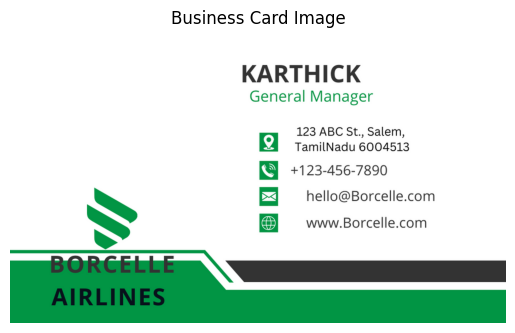

In [ ]:
result=extract_data(image_path="/content/3.png")

In [ ]:
dic=dic_formate(result)
dic
import pandas as pd
df=pd.DataFrame(dic)
df

,company_name,Name,designation,phone_num,email,website,Area,city,pincode,state
0,AIRLINES,KARTHICK,General Manager,+123-456-7890,hello@Borcelle.com,wwW.Borcelle.com,123 ABC St,Salem,600451,TamilNadu


In [ ]:
import pandas as pd
df=pd.DataFrame(dic)
df

NameError: name 'data' is not defined

In [ ]:
import easyocr
import cv2
import matplotlib.pyplot as plt
import warnings
import re
def extract_data(image_path):
  image = cv2.imread(image_path)
# Optional: Display the image
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title("Business Card Image")
  plt.axis("off")
  plt.show()

  # Step 2: Create EasyOCR reader
  reader = easyocr.Reader(['en'])  # You can add more languages if needed

  # Step 3: Perform OCR
  results = reader.readtext(image,detail=0)
  return results

In [ ]:
import re
data={"pincode":[]}
# Sample input
text = "TamilNadu 6001134"

# Regular expression to match a 6-digit PIN code
pin_1 = re.search(r"\b[1-9]\d{2}\s?\d{3}\b", text)
pin_2 = re.findall(r"[a-zA-z]+\s(\d{6})", text)
pin_3=re.findall(r"[a-zA-z]+\s([\d{7}])", text)
#print(len(pin_2))
if pin_1:
    data["pincode"].append(pin_1.group())
elif pin_2:
    data["pincode"].append(pin_2)
elif pin_3:

    data["pincode"].append(pin_3[1])
print(data["pincode"])

[['600113']]


In [ ]:
results=extract_data(image_path)
print(results)

NameError: name 'image_path' is not defined

In [ ]:
import pandas as pd
import re
def dic_formate(results, image_path=None):
    data = {
        "company_name": [],
        "Name": [],
        "designation": [],
        "phone_num": [],
        "email": [],
        "website": [],
        "Area": [],
        "city": [],
        "pincode": [],
        "state": []
        #"Image": []
    }

    #if image_path is not None:
     #   data["Image"].append(image_path)

    if results:
        data["Name"].append(results[0])
        data["designation"].append(results[1])


    email_pattern = re.compile(r"^[A-Za-z0-9._+%-]+@[A-Za-z0-9-.]+\.[A-Za-z]{2,}$")
    phone_pattern = re.compile(r"\+?\(?\d{1,3}\)?[-\s]?\d{3}[-\s]?\d{4}")
    phone_list=[]
    for ind, i in enumerate(results):
        if phone_pattern.match(i):
          phone_list.append(i)

        if email_pattern.match(i):
            data["email"].append(i)

        if re.findall("^[0-9].+, [a-zA-Z]+", i):
            data["Area"].append(i.split(",")[0])
        elif re.findall("[0-9] [a-zA-Z]+", i):
            data["Area"].append(i)

        if "www " in i.lower() or "www." in i.lower():
            data["website"].append(i)
        elif "WWW" in i:
            if ind + 1 < len(results):
                res = results[ind] + '.' + results[ind + 1]
                data["website"].append(res)

        c_match = re.fullmatch(r"^St ,$", i)
        if c_match:
            if ind == len(results) - 1 and len(results) > 2:
                data["company_name"].append(results[-2])
        elif ind == len(results) - 1:
            data["company_name"].append(i)

        match1 = re.findall(r".+St,,\s*([a-zA-Z]+).+", i)
        match2 = re.findall(r".+St ,\s([a-zA-Z]+)", i)
        match3 = re.findall(r"^[E].+", i)
        if match1:
            data["city"].append(match1[0])
        elif match2:
            data["city"].append(match2[0])
        elif match3:
            data["city"].append(match3[0])

        pin_1 = re.search(r"\b[1-9]\d{2}\s?\d{3}\b", i)
        pin_2 = re.findall(r"[a-zA-z]+\s(\d{6})", i)
        #pin_3=re.findall(r"[a-zA-z]+\s([\d{7}])", i)
        if pin_1:
            data["pincode"].append(pin_1.group())
        elif pin_2:
            data["pincode"].append(pin_2[0])


        state1 = re.findall(r"([a-zA-z]+)\s[\d{6}]", i)
        state2 = re.findall(r"\s([A-Za-z]+Nadu)", i)
        if state1:
            data["state"].append(state1[0])
        elif state2:
            if len(state2) > 0:
                data["state"].append(state2[0])

    data["phone_num"].append(", ".join(phone_list) if phone_list else "")

    df=pd.DataFrame(data)

    # Convert all list values to string (comma-separated), or 'N/A' if empty

    # Create and return DataFrame
    return data
    # Create and return DataFrame
    #return data#pd.DataFrame([structured_data_cleaned])


In [ ]:
dic=dic_formate(results)
dic

0
0
0
0
0
0
0
0
1
0


{'company_name': ['digitals'],
 'Name': ['Selva'],
 'designation': ['DATA MANAGER'],
 'phone_num': ['+123-456-7890', '+123-456-7891'],
 'email': ['hello@XYZ1.com'],
 'website': ['WWW XYZI.com'],
 'Area': ['123 ABC St '],
 'city': ['Chennai'],
 'pincode': ['600113'],
 'state': ['TamilNadu']}

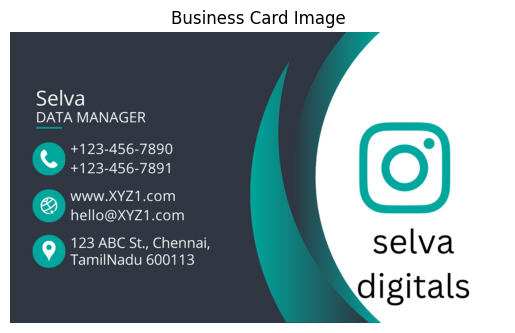

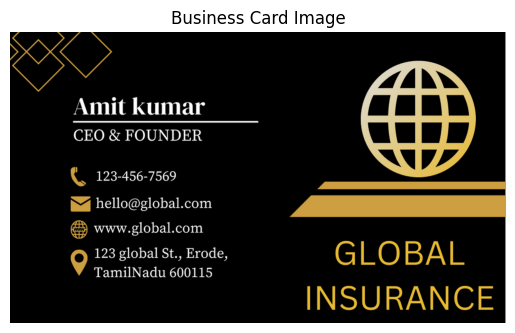

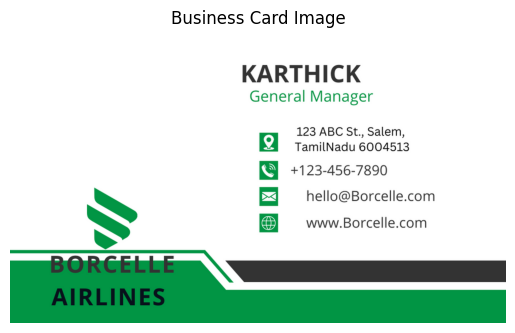

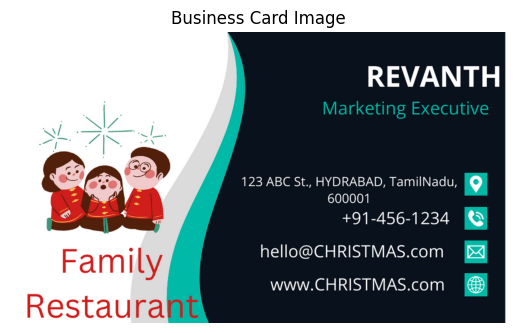

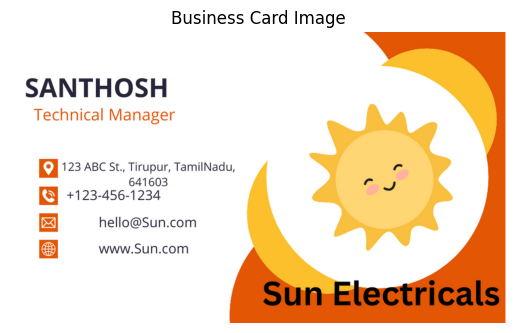

{'company_name': ['digitals', 'INSURANCE', 'AIRLINES', 'Restaurant', 'Sun Electricals'], 'Name': ['Selva', 'Amit kumar', 'KARTHICK', 'REVANTH', 'SANTHOSH'], 'designation': ['DATA MANAGER', 'CEO & FOUNDER', 'General Manager', 'Marketing Executive', 'Technical Manager'], 'phone_num': ['+123-456-7890, +123-456-7891', '123-456-7569', '+123-456-7890', '+91-456-1234', '+123-456-1234'], 'email': ['hello@XYZ1.com', 'hello@global.com', 'hello@Borcelle.com', 'hello@CHRISTMAS.com', 'hello@Sun.com'], 'website': ['WWW XYZI.com', 'WWW.global.com', 'wwW.Borcelle.com', 'wwW.CHRISTMAS.com', 'www.Suncom'], 'Area': ['123 ABC St ', '123 global', '123 ABC St ', '123 ABC St', '123 ABC St '], 'city': ['Chennai', 'Erode,', 'Salem', 'HYDRABAD', 'Tirupur'], 'pincode': ['600113', '600115', '600451', '600001', '641603'], 'state': ['TamilNadu', 'TamilNadu', 'TamilNadu', 'TamilNadu', 'TamilNadu'], 'Image': ['', '', '', '', '']}


In [ ]:
merge_data={"company_name":[],
      "Name":[],
      "designation":[],
      "phone_num":[],
      "email":[],
      "website":[],
      "Area":[],
      "city":[],
      "pincode":[],
      "state":[],
      "Image":[]}
#for key in merge_data:
    #print(merge_data[key])
 #   merge_data[key].extend(data.get(key, []))
image_paths = ["/content/1.png", "/content/2.png", "/content/3.png", "/content/4.png", "/content/5.png"]

for path in image_paths:
    extracted_text = extract_data(path)
    dic = dic_formate(extracted_text)  # pass text first, path second
    #print(dic)
    for key in merge_data:
        #print(merge_data[key])
        val = dic.get(key, [])
        merged_value = ", ".join(val) if isinstance(val, list) else val

        merge_data[key].append(merged_value)
print(merge_data)

In [ ]:
import pandas as pd
df=pd.DataFrame(merge_data)
df['pincode'] = df['pincode'].str.extract(r'(\d{6})')
df

,company_name,Name,designation,phone_num,email,website,Area,city,pincode,state,Image
0,digitals,Selva,DATA MANAGER,"+123-456-7890, +123-456-7891",hello@XYZ1.com,WWW XYZI.com,123 ABC St,Chennai,600113,TamilNadu,
1,INSURANCE,Amit kumar,CEO & FOUNDER,123-456-7569,hello@global.com,WWW.global.com,123 global,"Erode,",600115,TamilNadu,
2,AIRLINES,KARTHICK,General Manager,+123-456-7890,hello@Borcelle.com,wwW.Borcelle.com,123 ABC St,Salem,600451,TamilNadu,
3,Restaurant,REVANTH,Marketing Executive,+91-456-1234,hello@CHRISTMAS.com,wwW.CHRISTMAS.com,123 ABC St,HYDRABAD,600001,TamilNadu,
4,Sun Electricals,SANTHOSH,Technical Manager,+123-456-1234,hello@Sun.com,www.Suncom,123 ABC St,Tirupur,641603,TamilNadu,


In [ ]:
df[df["Name""]="KARTHICK"]

SyntaxError: unterminated string literal (detected at line 1) (<ipython-input-41-3026e2cf1ea6>, line 1)

In [ ]:
df['pincode'] = df['pincode'].str.extract(r'(\d{6})')

In [ ]:
df

,company_name,Name,designation,phone_num,email,website,Area,city,pincode,state,Image
0,digitals,Selva,DATA MANAGER,"+123-456-7890, +123-456-7891",hello@XYZ1.com,WWW XYZI.com,123 ABC St,Chennai,600113,TamilNadu,/content/1.png
1,INSURANCE,Amit kumar,CEO & FOUNDER,123-456-7569,hello@global.com,WWW.global.com,123 global,"Erode,",600115,TamilNadu,/content/2.png
2,AIRLINES,KARTHICK,General Manager,+123-456-7890,hello@Borcelle.com,wwW.Borcelle.com,123 ABC St,Salem,600451,TamilNadu,/content/3.png
3,Restaurant,REVANTH,Marketing Executive,+91-456-1234,hello@CHRISTMAS.com,wwW.CHRISTMAS.com,123 ABC St,HYDRABAD,600001,TamilNadu,/content/4.png
4,Sun Electricals,SANTHOSH,Technical Manager,+123-456-1234,hello@Sun.com,www.Suncom,123 ABC St,Tirupur,641603,TamilNadu,/content/5.png


In [ ]:
import sqlite3
conn=sqlite3.connect("biz_card.db")
cursor=conn.cursor()

In [ ]:
cursor.execute(""" create table if not exists Bizcard_details(company_name text,	Name text,designation text,
phone_num	text,email text,	website	text,Area	text,city text,	pincode integer,	state text
)
""")

In [ ]:
for _, row in dic.iterrows():
    cursor.execute("""
        INSERT INTO Bizcard_details (company_name,	Name,	designation,	phone_num,	email,	website,
        	Area,city,	pincode	,state
) VALUES (?, ?,?,?,?,?,?,?,?,? )
    """, (
        row["company_name"], row["Name"], row["designation"], row["phone_num"],
        row["email"], row["website"], row["Area"], row["city"],
        row["pincode"], row["state"]
    ))
conn.commit()

In [ ]:
cursor.execute("select * from Bizcard_details")
result=cursor.fetchall()
if result:
    print("Entry found:", result)
else:
    print("No such entry.")



Entry found: [('digitals', 'Selva', 'DATA MANAGER', '+123-456-7890, +123-456-7891', 'hello@XYZ1.com', 'WWW XYZI.com', '123 ABC St ', 'Chennai', 600113, 'TamilNadu')]


In [ ]:
import sqlite3
import pandas as pd
conn=sqlite3.connect("biz_card.db")
cursor=conn.cursor()
cursor.execute(""" create table if not exists Bizcard_details(company_name text,	Name text,designation text,
phone_num	text,email text,	website	text,Area	text,city text,	pincode integer,	state text
)
""")
for _, row in dic.iterrows():
    cursor.execute("""
        INSERT INTO Bizcard_details (company_name,	Name,	designation,	phone_num,	email,	website,
        	Area,city,	pincode	,state
) VALUES (?, ?,?,?,?,?,?,?,?,? )
    """, (
        row["company_name"], row["Name"], row["designation"], row["phone_num"],
        row["email"], row["website"], row["Area"], row["city"],
        row["pincode"], row["state"]
    ))
conn.commit()
cursor.execute("SELECT * FROM Bizcard_details WHERE rowid = last_insert_rowid()")
result = cursor.fetchall()
#columns = [desc[0] for desc in cursor.description]  # Get column names
columns=[]
for desc in cursor.description:
  columns.append(desc[0])

#print(columns)
df=pd.DataFrame(result,columns=columns)
df

,company_name,Name,designation,phone_num,email,website,Area,city,pincode,state
0,digitals,Selva,DATA MANAGER,"+123-456-7890, +123-456-7891",hello@XYZ1.com,WWW XYZI.com,123 ABC St,Chennai,600113,TamilNadu


In [ ]:
columns

In [ ]:
import re
data={"phone_num":[]}
text=["+123-456-7890","+123-456-7891"]
phone_pattern = re.compile(r"\+?\(?\d{1,3}\)?[-\s]?\d{3}[-\s]?\d{4}")
phone_list=[]
for i in text:
  if phone_pattern.match(i):
    phone_list.append(i)
data["phone_num"].append(", ".join(phone_list) if phone_list else "")
print(data["phone_num"])



['+123-456-7890, +123-456-7891']


In [ ]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 65.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 94.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.5 MB/s eta 0:00:00


In [ ]:
!pip install pyngrok

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%%writefile bizcard.py
import streamlit as st
import easyocr
import matplotlib.pyplot as plt
import cv2
import warnings
import re
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3


def get_connection(db_path='/content/drive/MyDrive/BizcardDB/biz_cards.db'):
    conn = sqlite3.connect(db_path)
    cursor = conn.cursor()
    return conn, cursor
def crete_table():
  conn,cursor=get_connection(db_path='/content/drive/MyDrive/BizcardDB/biz_cards.db')
  cursor.execute("""
            CREATE TABLE IF NOT EXISTS Bizcard_details (
                company_name TEXT,
                Name TEXT,
                designation TEXT,
                phone_num TEXT,
                email TEXT PRIMARY KEY,
                website TEXT,
                Area TEXT,
                city TEXT,
                pincode TEXT,
                state TEXT
            )
        """)
  conn.commit()


def extract_data(uploaded_file):
    # Step 1: Open image using PIL
    image = Image.open(uploaded_file)
    image_np = np.array(image)  # Convert to NumPy array for easyocr

    # Step 2: Display image in Streamlit

    st.image(image_np, caption="Uploaded Business Card", use_container_width=True)

    # Step 3: OCR using EasyOCR
    reader = easyocr.Reader(['en'])
    results = reader.readtext(image_np, detail=0)  # Just text, no coordinates

    return results, image_np

def dic_formate(results, image_path=None):
    data = {
        "company_name": [],
        "Name": [],
        "designation": [],
        "phone_num": [],
        "email": [],
        "website": [],
        "Area": [],
        "city": [],
        "pincode": [],
        "state": []
        #"Image": []
    }

    #if image_path is not None:
     #   data["Image"].append(image_path)

    if results:
        data["Name"].append(results[0])
        data["designation"].append(results[1])


    email_pattern = re.compile(r"^[A-Za-z0-9._+%-]+@[A-Za-z0-9-.]+\.[A-Za-z]{2,}$")
    phone_pattern = re.compile(r"\+?\(?\d{1,3}\)?[-\s]?\d{3}[-\s]?\d{4}")
    phone_list=[]
    for ind, i in enumerate(results):
        if phone_pattern.match(i):
          phone_list.append(i)

        if email_pattern.match(i):
            data["email"].append(i)

        if re.findall("^[0-9].+, [a-zA-Z]+", i):
            data["Area"].append(i.split(",")[0])
        elif re.findall("[0-9] [a-zA-Z]+", i):
            data["Area"].append(i)

        if "www " in i.lower() or "www." in i.lower():
            data["website"].append(i)
        elif "WWW" in i:
            if ind + 1 < len(results):
                res = results[ind] + '.' + results[ind + 1]
                data["website"].append(res)

        c_match = re.fullmatch(r"^St ,$", i)
        if c_match:
            if ind == len(results) - 1 and len(results) > 2:
                data["company_name"].append(results[-2])
        elif ind == len(results) - 1:
            data["company_name"].append(i)

        match1 = re.findall(r".+St,,\s*([a-zA-Z]+).+", i)
        match2 = re.findall(r".+St ,\s([a-zA-Z]+)", i)
        match3 = re.findall(r"^[E].+", i)
        if match1:
            data["city"].append(match1[0])
        elif match2:
            data["city"].append(match2[0])
        elif match3:
            data["city"].append(match3[0])

        pin_1 = re.search(r"\b[1-9]\d{2}\s?\d{3}\b", i)
        pin_2 = re.findall(r"[a-zA-z]+\s(\d{6})", i)
        #pin_3=re.findall(r"[a-zA-z]+\s([\d{7}])", i)
        if pin_1:
            data["pincode"].append(pin_1.group())
        elif pin_2:
            data["pincode"].append(pin_2[0])


        state1 = re.findall(r"([a-zA-z]+)\s[\d{6}]", i)
        state2 = re.findall(r"\s([A-Za-z]+Nadu)", i)
        if state1:
            data["state"].append(state1[0])
        elif state2:
            if len(state2) > 0:
                data["state"].append(state2[0])

    data["phone_num"].append(", ".join(phone_list) if phone_list else "")

    df=pd.DataFrame(data)

    # Convert all list values to string (comma-separated), or 'N/A' if empty

    # Create and return DataFrame
    return df
#import sqlite3

def insert_to_sqlite_manual(df, db_path="/content/drive/MyDrive/BizcardDB/biz_cards.db"):
    try:
        # Create table if not exists

        conn , cursor= get_connection(db_path)
        cursor.execute("""
            CREATE TABLE IF NOT EXISTS Bizcard_details (
                company_name TEXT,
                Name TEXT,
                designation TEXT,
                phone_num TEXT,
                email TEXT PRIMARY KEY,
                website TEXT,
                Area TEXT,
                city TEXT,
                pincode TEXT,
                state TEXT
            )
        """)
        conn.commit()

        for _, row in df.iterrows():
            # Check if record already exists

                # Insert new row
          cursor.execute("""
              INSERT INTO Bizcard_details (
                  company_name, Name, designation, phone_num, email,
                  website, Area, city, pincode, state
              ) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
          """, (
              row["company_name"], row["Name"], row["designation"], row["phone_num"],
              row["email"], row["website"], row["Area"], row["city"],
              str(row["pincode"]), row["state"]
          ))
          st.success(f"✅ Inserted: {row['Name']} ({row['email']})")

        conn.commit()


    except Exception as e:
        st.error(f"❌ Error inserting into SQLite DB: {e}")
def get_card_details(name):
    conn, cursor = get_connection()

    query="SELECT * FROM Bizcard_details WHERE Name = ?"
    card_df = pd.read_sql_query(query, conn,params=(name,))
    #card_details = cursor.fetchall()
    #conn.close()
    return card_df
def delete_details(name):
  conn, cursor = get_connection()
  query="delete from Bizcard_details where Name=? "
  cursor.execute(query,(name,))
  conn.commit()
def uniqe_name():
  conn,cursor=get_connection(db_path='/content/drive/MyDrive/BizcardDB/biz_cards.db')
  query="SELECT distinct Name FROM Bizcard_details"
  name_df=pd.read_sql(query,conn)
  return name_df
#crete_table()
# Title
st.title(':blue[Business Card Data Extraction]')

# Tabs
tab1, tab2 = st.tabs(["Data Extraction zone", "Data modification zone"])
#col1, col2 = st.columns(2)
# ==========================================   /   /   Data Extraction and upload zone   /   /   ============================================== #

with tab1:
    st.subheader(':red[Data Extraction]')

    # Image file uploaded
    import_image = st.file_uploader('**Select a business card (Image file)**', type=['png', 'jpg', "jpeg"],
                                    accept_multiple_files=False)

    # Note
    st.markdown(
        '''File extension support: **PNG, JPG, TIFF**, File size limit: **2 Mb**, Image dimension limit: **1500 pixel**, Language : **English**.''')
    if import_image is not None:
      results,image_np=extract_data(import_image)
      #dict_form=dic_formate(results,image_path=None)
      if results:
        st.subheader("Extracted Text:")
        st.write(results)  # This is a list of strings

        structured_data = dic_formate(results)  # You want just the list
        #muti_to_single=format_if_many(structured_data)

        st.subheader("Structured Data:")
        if not structured_data.empty:
          st.dataframe(structured_data, use_container_width=True)
          if st.button("insert", key="insert_button"):
            insert_to_sqlite_manual(structured_data, db_path="/content/drive/MyDrive/BizcardDB/biz_cards.db")

        else:
            st.warning("No structured data to display.")



    else:
        st.warning("No text was extracted. Try a clearer image.")
with tab2:
  st.subheader(':blue[Data modification]')
  #with col1:
  st.subheader(':green[Data display]')
  name= st.text_input("Enter card holder Name")
  if st.button("Enter"):
    conn, cursor = get_connection()
    details=get_card_details(name)
    if not details.empty:
      #conn, cursor = get_connection()
      #columns = [desc[0] for desc in cursor.description]  # <- This gives column names
      #df=pd.DataFrame(details,columns=columns)
      st.dataframe(details, use_container_width=True)
    else:
      st.warning("No record found for that name.")



  st.subheader("Edit Card Details")
  conn,cursor=get_connection(db_path='/content/drive/MyDrive/BizcardDB/biz_cards.db')
  query="SELECT * FROM Bizcard_details"
  df=pd.read_sql(query,conn)



  name_df=uniqe_name()
  selected_name = st.selectbox("Select a Name to Edit", name_df)

  filtered_df = df[df['Name'] == selected_name]
  if selected_name and not filtered_df.empty:
    row = filtered_df.iloc[0]
              # Editable form
    with st.form(key='edit_form'):
      company_name = st.text_input("Company Name", row['company_name'])
      name = st.text_input("Name", row['Name'])
      designation = st.text_input("Designation", row['designation'])
      phone_num = st.text_input("Phone Number", row['phone_num'])
      email = st.text_input("Email", row['email'])
      website = st.text_input("Website", row['website'])
      area = st.text_input("Area", row['Area'])
      city = st.text_input("City", row['city'])
      pincode = st.text_input("Pincode", row['pincode'])
      state = st.text_input("State", row['state'])

      submitted = st.form_submit_button("Update")

      if submitted:
          try:
              update_query = """
                  UPDATE Bizcard_details SET
                      company_name = ?, Name = ?, designation = ?, phone_num = ?,
                      email = ?, website = ?, Area = ?, city = ?, pincode = ?, state = ?
                  WHERE Name = ?
              """
              cursor.execute(update_query, (
                  company_name, name, designation, phone_num, email,
                  website, area, city, pincode, state,
                  row['Name']  # original identifiers
              ))
              conn.commit()
              st.success("✅ Business card updated successfully.")
          except Exception as e:
              st.error(f"❌ Error updating card: {e}")
      else:
          st.warning("No record found for that name.")
  else:
    st.warning("No record found for that name.")



  st.subheader("delete card details")
  #conn,cursor=get_connection(db_path='/content/drive/MyDrive/BizcardDB/biz_cards.db')
  #query="SELECT * FROM Bizcard_details"
  name_DF=uniqe_name()
  selected_name_for_delete=st.selectbox("select name to delete",name_DF)
  if st.button("Delete"):
    if selected_name_for_delete:
      conn, cursor = get_connection()
      check_query="SELECT * FROM Bizcard_details where Name=?"
      cursor.execute(check_query,(selected_name_for_delete,))
      result=cursor.fetchone()
      if result:
        conn, cursor = get_connection()
        delete=delete_details(name)
        st.success("✅ Record deleted successfully.")
      else:
        st.warning("No record found to delete.")
  else:
    st.warning("No record deleted for that name.")





















Writing bizcard.py


In [ ]:
import sqlite3

conn = sqlite3.connect("Bizcard.db")
cursor = conn.cursor()

In [ ]:
import sqlite3
def get_connection(db_path='/content/drive/MyDrive/BizcardDB/Bizcard.db'):
    conn = sqlite3.connect(db_path)
    cursor = conn.cursor()

    return conn, cursor
conn,cursor=get_connection(db_path='/content/drive/MyDrive/BizcardDB/biz_cards.db')


In [ ]:
import pandas as pd
conn , cursor= get_connection(db_path='/content/drive/MyDrive/BizcardDB/biz_cards.db')
cursor.execute("""
    select * from  Bizcard_details""")
result=cursor.fetchall()

pd.DataFrame(result)


,0,1,2,3,4,5,6,7,8,9
0,AIRLINES,KARTHICK,General Manager,+123-456-7890,hello@Borcelle.in,wwW.Borcelle.com,123 ABC St,Salem,600451,TamilNadu
1,digital,Selvas,DATA MANAGER,"+123-456-7890, +123-456-7891",hello@XYZ1.com,WWW XYZI.com,123 ABC St,Chennai,600113,TamilNadu
2,Restaurant,REVANTH,Marketing Executive,+91-456-1234,hello@CHRISTMAS.com,wwW.CHRISTMAS.com,123 ABC St,HYDRABAD,600001,TamilNadu


In [ ]:
def delete_details(name):
  conn, cursor = get_connection()
  query="delete from Bizcard_details where Name=? "
  cursor.execute(query,(name.strip().lower(),))
  conn.commit()
  delete_details("Selvas")

In [ ]:
conn, cursor = get_connection(db_path='/content/drive/MyDrive/BizcardDB/biz_cards.db')
cursor.execute("PRAGMA table_info(Bizcard_details);")
columns = cursor.fetchall()
conn.close()
print(columns)


[(0, 'company_name', 'TEXT', 0, None, 0), (1, 'Name', 'TEXT', 0, None, 0), (2, 'designation', 'TEXT', 0, None, 0), (3, 'phone_num', 'TEXT', 0, None, 0), (4, 'email', 'TEXT', 0, None, 1), (5, 'website', 'TEXT', 0, None, 0), (6, 'Area', 'TEXT', 0, None, 0), (7, 'city', 'TEXT', 0, None, 0), (8, 'pincode', 'TEXT', 0, None, 0), (9, 'state', 'TEXT', 0, None, 0)]


In [ ]:
cursor.execute("""
    SELECT name
    FROM sqlite_master
    WHERE type='table' AND name='Bizcard_details'
""")
result = cursor.fetchone()

if result is None:
    print("✅ Table 'Bizcard_details' does not exist. It has been deleted.")
else:
    print("❌ Table 'Bizcard_details' still exists.")


❌ Table 'Bizcard_details' still exists.


In [ ]:
import pandas as pd
conn , cursor= get_connection(db_path='/content/drive/MyDrive/BizcardDB/biz_cards.db')
cursor.execute("""
    DELETE FROM Bizcard_details
WHERE rowid NOT IN (
    SELECT MIN(rowid)
    FROM Bizcard_details
    GROUP BY email
);""")
#result=cursor.fetchall()

#df = pd.read_sql_query("SELECT * FROM Bizcard_details", conn)
#df



OperationalError: database is locked

In [ ]:
def crete_table():
  conn,cursor=get_connection(db_path='/content/drive/MyDrive/BizcardDB/biz_cards.db')
  cursor.execute("""
            CREATE TABLE IF NOT EXISTS Bizcard_details (
                company_name TEXT,
                Name TEXT,
                designation TEXT,
                phone_num TEXT,
                email TEXT PRIMARY KEY,
                website TEXT,
                Area TEXT,
                city TEXT,
                pincode TEXT,
                state TEXT
            )
        """)
  conn.commit()

crete_table()

In [ ]:
# download db
#load db in google drive
#locate db from colab

#

In [ ]:
!npm install localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦
added 22 packages in 3s
⠦
⠦3 packages are looking for funding
⠦  run `npm fund` for details
⠦npm notice
npm notice New major version of npm available! 10.8.2 -> 11.4.1
npm notice Changelog: https://github.com/npm/cli/releases/tag/v11.4.1
npm notice To update run: npm install -g npm@11.4.1
npm notice
⠦

In [ ]:
!streamlit run /content/bizcard.py &>/content/logs.txt & npx localtunnel --port 8501 & curl ipv4.icanhazip.com

35.223.214.56
⠙⠹your url is: https://calm-rooms-admire.loca.lt


In [ ]:
def dic_formate(results):
    data={"company_name":[],
      "Name":[],
      "designation":[],
      "phone_num":[],
      "email":[],
      "website":[],
      "Area":[],
      "city":[],
      "pincode":[],
      "state":[],
      "Image":[]}
    #if image is not None:
       # _, img_encoded = cv2.imencode('.jpg', image)
        #data["Image"] = img_encoded.tobytes()
    #if image_path is not None:
      #  data["Image"].append(image_path)

    # Store image bytes
    #data["Image"].append()

    #data["Image"].append(image)
    data["Name"].append(results[0])
    data["designation"].append(results[1])
    phone_pattern=re.compile(r"\+?\(?\d{1,3}\)?[-\s]?\d{3}[-\s]?\d{4}")
    #domain_pattern=re.compile(r"(?:www\.?|WWW\.?|wWW\.?|Www\.?)?\s*([\w.-]+\.\w{2,})", re.IGNORECASE)

    email_pattern=re.compile(r"^[A-Za-z0-9._+%-]+@[A-Za-z0-9-.]+\.[A-Za-z]{2,}$")

    for ind, i in enumerate(results):
        if phone_pattern.match(i):
            data["phone_num"].append(i)
        if email_pattern.match(i):


            data["email"].append(i)

        if re.findall("^[0-9].+, [a-zA-Z]+", i):
            data["Area"].append(i.split(",")[0])
        elif re.findall("[0-9] [a-zA-Z]+", i):
            data["Area"].append(i)
        if "www " in i.lower() or "www." in i.lower():
            data["website"].append(i)
        elif "WWW" in i:

            res=results[ind]+'.'+results[ind+1]
            data["website"].append(res)
        c_match=re.fullmatch(r"^St ,$",i)
        if c_match:
          if ind==len(results)-1 and len(results)>2:
              data["company_name"].append(results[-2])

        elif ind==len(results)-1:
            data["company_name"].append(i)
        match1 = re.findall(r".+St,,\s*([a-zA-Z]+).+", i)
        match2=re.findall(r".+St ,\s([a-zA-Z]+)", i)
        match3=re.findall(r"^[E].+",i)
        if match1:
            data["city"].append(match1[0])
        elif match2:
            data["city"].append(match2[0])
        elif match3:
            data["city"].append(match3[0])
        pin_1=re.findall(r"\d{6}",i)
        pin_2=re.findall(r"[a-zA-z]+\s([\d{6}])",i)
        if pin_1:
            data["pincode"].append(i)
        elif pin_2:
            data["pincode"].append(pin_2[1])
        state1=re.findall(r"([a-zA-z]+)\s[\d{6}]",i)
        #state2=re.findall(r"\s*([A-Za-z]+)[,]",i)
        state2=re.findall(r"\s([A-Za-z]+Nadu)",i)
        #print(f"state1: {state1}, state2: {state2}")
        if state1:
            data["state"].append(state1[0])
        elif state2:
            if len(state2) > 0:
                data["state"].append(state2[0])
            # Make values display-friendly: only if list has more than 2 items
  # Convert all list values to string (comma-separated), or 'N/A' if empty
    structured_data_cleaned = {
        k: ', '.join(v) if isinstance(v, list) and len(v) > 0 else 'N/A'
        for k, v in data.items()
    }

    # Create and return DataFrame
    return pd.DataFrame([structured_data_cleaned])


In [ ]:
def get_all_names(db_path="biz_card.db"):
